## References

* HAT-P-44 b [(Fukui+16a)](http://iopscience.iop.org/article/10.3847/0004-637X/819/1/27/pdf)
* K2-3d [(Fukui+16b)](http://iopscience.iop.org/article/10.3847/0004-6256/152/6/171) 
* [HAT-P-44 b ref](http://exoplanet.eu/catalog/HAT-P-44_b/)
* [limb-darkening measurement](https://www.aanda.org/articles/aa/pdf/2013/12/aa22079-13.pdf)
* [stellar limb darkening and exoplanetary transits (Howarth 2011)](https://arxiv.org/pdf/1106.4659.pdf)

## To do

* See Narita et al. (2013) for modeling the ground-based transit light curves
* time stamps of the photometric data are placed onto the BJD$_{TDB}$ system using the code by Eastman et al. (2010)
* 

In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'moscatel'

## import and parse csv

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import multiprocessing

In [4]:
import getpass
from tqdm import tqdm

data_dir = '/home/'+getpass.getuser()+'/data/transit/hatp44_data/lc_hatp44_msct_170215'
file_list=glob.glob(data_dir+'/*.dat')
file_list.sort()

name='hatp44'
date='170215'
target_star_id='2'
comparison_star_id='1'#13, #3
radii_range='9-14'

DF={}
bands='g,r,z'.split(',')
for b in bands:
    fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
    df=pd.read_csv(os.path.join(data_dir,fname), delimiter=' ', parse_dates=True)
    df = df.set_index('BJD(TDB)-2450000')
    try:
        df=df.drop('Unnamed: 20',1)
    except:
        pass
    #df.head()
    DF[b]=df

In [24]:
import getpass
from tqdm import tqdm

offset=813259999999999999
df=pd.read_csv('final_grz.csv', parse_dates=True, index_col=0)
#final_df = df.set_index(pd.to_datetime(df.index, unit='D', origin=offset))
final_df.head()

,g(f-sys),g_flux,g_full,g_mod,g_sys,r(f-sys),r_flux,r_full,r_mod,r_sys,z(f-sys),z_flux,z_full,z_mod,z_sys
2017-02-15 02:25:42.384000,1.000982,1.001389,1.000407,1.0,0.000407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15 02:27:49.392000,1.004419,1.004532,1.000113,1.0,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15 02:28:53.414400,0.999370,1.000769,1.001399,1.0,0.001399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15 02:29:56.486400,1.002913,1.004996,1.002083,1.0,0.002083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15 02:31:00.508800,0.999687,1.001463,1.001776,1.0,0.001776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comparison: Raw

In [25]:
final_df.columns

Index([u'g(f-sys)', u'g_flux', u'g_full', u'g_mod', u'g_sys', u'r(f-sys)',
       u'r_flux', u'r_full', u'r_mod', u'r_sys', u'z(f-sys)', u'z_flux',
       u'z_full', u'z_mod', u'z_sys'],
      dtype='object')

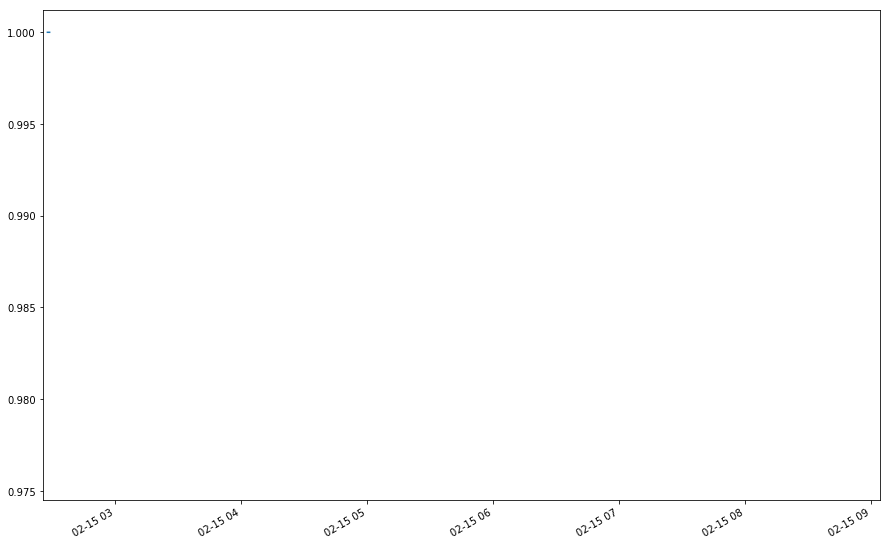

In [26]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
final_df['g_mod'].plot()

/home/jp/miniconda2/envs/moscatel/lib/python2.7/site-packages/pandas/plotting/_core.py:1682: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c2491e810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c2246fe10>], dtype=object)

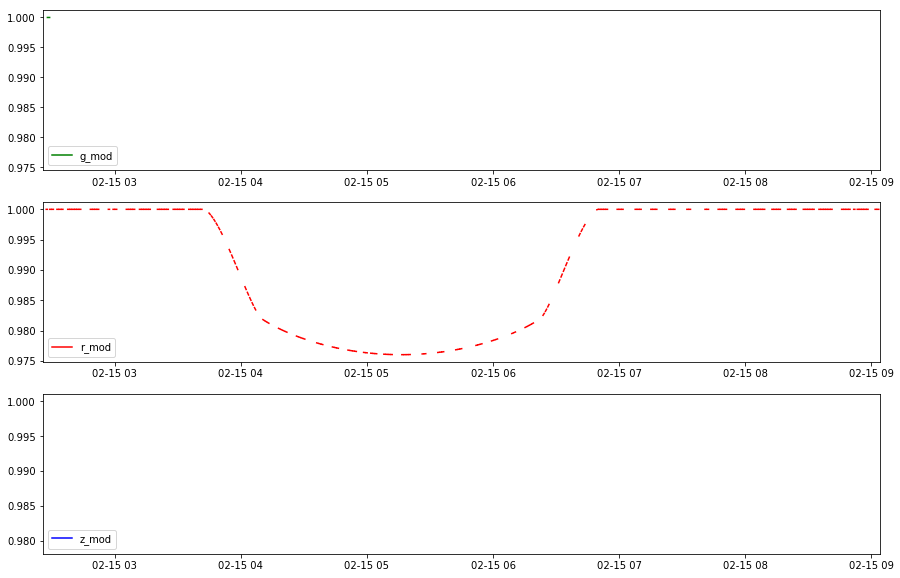

In [16]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
final_df[cols2].plot(ax=ax, color=colors, linestyle='-', subplots=True)

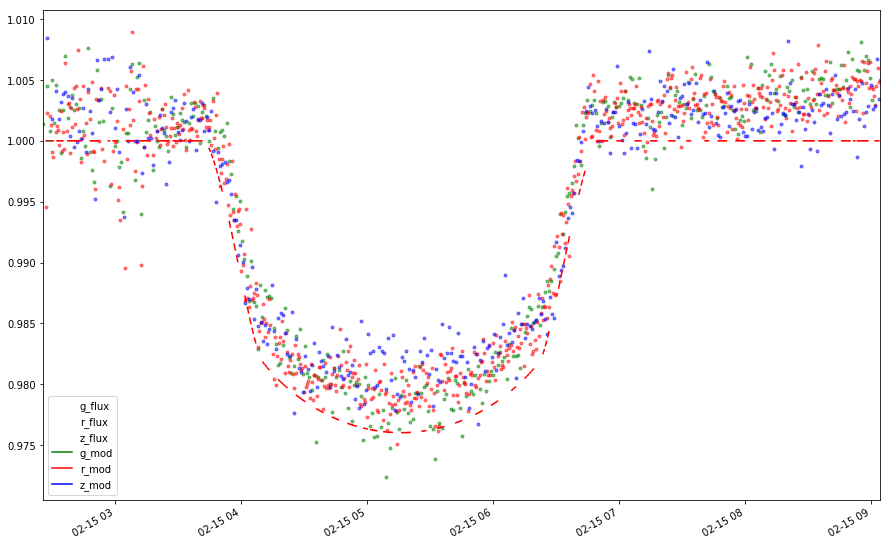

In [21]:
colors='g,r,b'.split(',')

fig,ax=plt.subplots(1,1,figsize=(15,10))

#relative flux
cols='g_flux,r_flux,z_flux'.split(',')
final_df[cols].plot(marker='.',alpha=0.5, linestyle='', color=colors, ax=ax)

cols2='g_mod,r_mod,z_mod'.split(',')
final_df[cols2].plot(ax=ax, color=colors)

In [8]:
DF['g'].columns

Index([u'airmass', u'sky(ADU)', u'dx(pix)', u'dy(pix)', u'fwhm(pix)',
       u'peak(ADU)', u'frame', u'flux(r=9.0)', u'err(r=9.0)', u'flux(r=10.0)',
       u'err(r=10.0)', u'flux(r=11.0)', u'err(r=11.0)', u'flux(r=12.0)',
       u'err(r=12.0)', u'flux(r=13.0)', u'err(r=13.0)', u'flux(r=14.0)',
       u'err(r=14.0)'],
      dtype='object')

In [9]:
g = DF['g'] #.index +2450000
df_g = g.set_index(pd.to_datetime(g.index, unit='D', origin=offset))
#df_g.head(2)
r = DF['r'] #.index +2450000
df_r = r.set_index(pd.to_datetime(r.index, unit='D', origin=offset))

z = DF['z'] #.index +2450000
df_z = z.set_index(pd.to_datetime(z.index, unit='D', origin=offset))

In [28]:
final_df.columns

Index([u'g(f-sys)', u'g_flux', u'g_full', u'g_mod', u'g_sys', u'r(f-sys)',
       u'r_flux', u'r_full', u'r_mod', u'r_sys', u'z(f-sys)', u'z_flux',
       u'z_full', u'z_mod', u'z_sys'],
      dtype='object')

[]

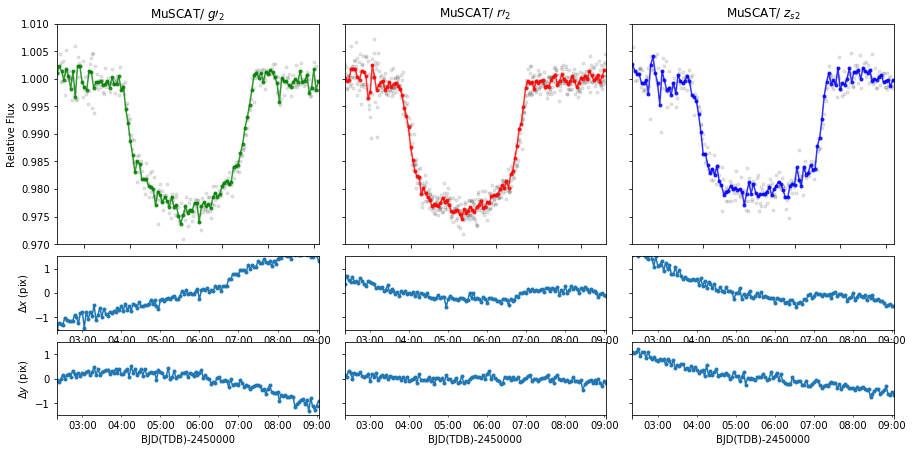

In [29]:
from matplotlib import gridspec

fig = plt.figure(figsize=(15,8))

gs = gridspec.GridSpec(3, 3,
                       width_ratios=[1, 1, 1],
                       height_ratios=[3, 1, 1],
                       wspace=0.1, 
                       hspace=0.1
                       )
clip=True
clipped=50
binning='3T'
ylims= [0.97,1.01]
ylims2= [-1.5,1.5]
ax1 = plt.subplot(gs[0])
if clip==True:
    final_df['g_flux'].dropna()[:-clipped].plot(marker='.',alpha=0.1, 
                                            linestyle='', color='k', ax=ax1)
    final_df['g_flux'].dropna()[:-clipped].resample(binning).mean().plot(marker='.', 
                                alpha=0.8, linestyle='-', color=colors[0], ax=ax1)
else:
    final_df['g_flux'].plot(marker='.',alpha=0.1, 
                                                linestyle='', color='k', ax=ax1)
    final_df['g_flux'].resample(binning).mean().plot(marker='.', 
                                alpha=0.8, linestyle='-', color=colors[0], ax=ax1)
ax1.set_ylim(ylims)
ax1.set_title(r'MuSCAT/ $g\prime_2$')
ax1.set_xticklabels([])
ax1.set_ylabel('Relative Flux')

ax2 = plt.subplot(gs[1])
if clip==True:
    final_df['r_flux'].dropna()[:-clipped].plot(marker='.',alpha=0.1, 
                linestyle='', color='k', ax=ax2)
    final_df['r_flux'].dropna()[:-clipped].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[1], ax=ax2)
else:
    final_df['r_flux'].plot(marker='.',alpha=0.1,
                            linestyle='', color='k', ax=ax2)
    final_df['r_flux'].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[1], ax=ax2)
ax2.set_ylim(ylims)
ax2.set_title(r'MuSCAT/ $r\prime_2$')
#ax2.axis()
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = plt.subplot(gs[2])
if clip==True:
    final_df['z_flux'].dropna()[:-clipped].plot(
        marker='.',alpha=0.1, linestyle='', color='k', ax=ax3)
    final_df['z_flux'].dropna()[:-clipped].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[2], ax=ax3)
else:
    final_df['z_flux'].plot(marker='.',alpha=0.1, linestyle='', color='k', ax=ax3)
    final_df['z_flux'].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[2], ax=ax3)
ax3.set_ylim(ylims)
ax3.set_title(r'MuSCAT/ $z_{s2}$') 
ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax4 = plt.subplot(gs[3])
df_g['dx(pix)'].resample(binning).mean().plot(marker='.', ax=ax4)
ax4.set_ylabel(r'$\Delta x$ (pix)')
ax4.set_ylim(ylims2)
ax4.set_xticklabels([])

ax5 = plt.subplot(gs[4])
df_r['dx(pix)'].resample(binning).mean().plot(marker='.', ax=ax5)
#ax5.set_ylabel(r'$\Delta x$ (pix)')
ax5.set_ylim(ylims2)
ax5.set_xticklabels([])
ax5.set_yticklabels([])

ax6 = plt.subplot(gs[5])
df_z['dx(pix)'].resample(binning).mean().plot(marker='.', ax=ax6)
#ax6.set_ylabel(r'$\Delta x (pix)')
ax6.set_ylim(ylims2)
ax6.set_xticklabels([])
ax6.set_yticklabels([])

ax7 = plt.subplot(gs[6])
df_g['dy(pix)'].resample(binning).mean().plot(marker='.', ax=ax7)
ax7.set_ylabel(r'$\Delta y$ (pix)')
ax7.set_ylim(ylims2)

ax8 = plt.subplot(gs[7])
df_r['dy(pix)'].resample(binning).mean().plot(marker='.', ax=ax8)
#ax8.set_ylabel(r'$\Delta y$ (pix)')
ax8.set_ylim(ylims2)
ax8.set_yticklabels([])

ax9 = plt.subplot(gs[8])
df_z['dy(pix)'].resample(binning).mean().plot(marker='.', ax=ax9)
#ax9.set_ylabel(r'$\Delta y$ (pix)')
ax9.set_ylim(ylims2)
ax9.set_yticklabels([])

Similar to Fig. 1 of [Fukui+2016b](http://iopscience.iop.org/article/10.3847/0004-637X/819/1/27/pdf)

![Fig. 1](figs/Fig1_Fukui2016b.png)

## Corrected

In [28]:
final_df.columns

Index([u'g(f-sys)', u'g_flux', u'g_full', u'g_mod', u'g_sys', u'r(f-sys)',
       u'r_flux', u'r_full', u'r_mod', u'r_sys', u'z(f-sys)', u'z_flux',
       u'z_full', u'z_mod', u'z_sys'],
      dtype='object')

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
cols='g(f-sys),r(f-sys),z(f-sys)'.split(',')
colors=['g','r','b']
final_df[cols].plot(marker='.',alpha=0.5, linestyle='', color=colors, ax=ax)
cols2='g_mod,r_mod,z_mod'.split(',')
final_df[cols2].plot(ax=ax, color=colors)

[]

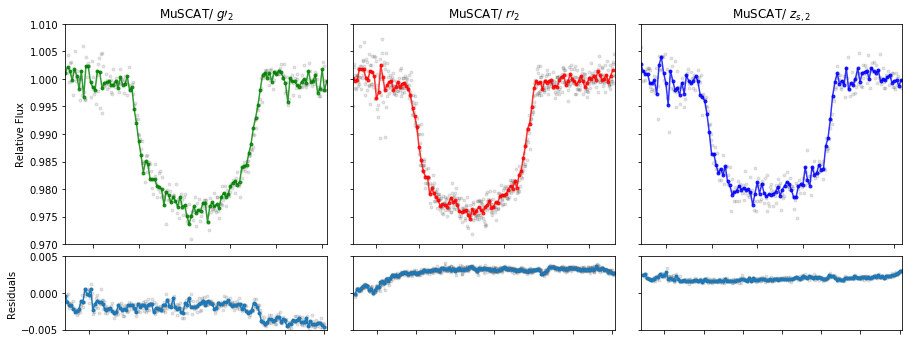

In [49]:
fig = plt.figure(figsize=(15,8))

gs = gridspec.GridSpec(3, 3,
                       width_ratios=[1, 1, 1],
                       height_ratios=[3, 1, 1],
                       wspace=0.1, 
                       hspace=0.1
                       )
clip=True
clipped=50
binning='3T'
ylims= [0.97,1.01]
ylims2= [-0.005,0.005]
ax1 = plt.subplot(gs[0])
if clip==True:
    final_df['g(f-sys)'].dropna()[:-clipped].plot(marker='.',alpha=0.1, 
                                            linestyle='', color='k', ax=ax1)
    final_df['g(f-sys)'].dropna()[:-clipped].resample(binning).mean().plot(marker='.', 
                                alpha=0.8, linestyle='-', color=colors[0], ax=ax1)
else:
    final_df['g(f-sys)'].plot(marker='.',alpha=0.1, 
                                                linestyle='', color='k', ax=ax1)
    final_df['g(f-sys)'].resample(binning).mean().plot(marker='.', 
                                alpha=0.8, linestyle='-', color=colors[0], ax=ax1)
ax1.set_ylim(ylims)
ax1.set_title(r'MuSCAT/ $g\prime_2$')
ax1.set_xticklabels([])
ax1.set_ylabel('Relative Flux')

ax2 = plt.subplot(gs[1])
if clip==True:
    final_df['r(f-sys)'].dropna()[:-clipped].plot(marker='.',alpha=0.1, 
                linestyle='', color='k', ax=ax2)
    final_df['r(f-sys)'].dropna()[:-clipped].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[1], ax=ax2)
else:
    final_df['r(f-sys)'].plot(marker='.',alpha=0.1,
                            linestyle='', color='k', ax=ax2)
    final_df['r(f-sys)'].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[1], ax=ax2)
ax2.set_ylim(ylims)
ax2.set_title(r'MuSCAT/ $r\prime_2$')
#ax2.axis()
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = plt.subplot(gs[2])
if clip==True:
    final_df['z(f-sys)'].dropna()[:-clipped].plot(
        marker='.',alpha=0.1, linestyle='', color='k', ax=ax3)
    final_df['z(f-sys)'].dropna()[:-clipped].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[2], ax=ax3)
else:
    final_df['z(f-sys)'].plot(marker='.',alpha=0.1, linestyle='', color='k', ax=ax3)
    final_df['z(f-sys)'].resample(binning).mean().plot(
        marker='.', alpha=0.8, linestyle='-', color=colors[2], ax=ax3)
ax3.set_ylim(ylims)
ax3.set_title(r'MuSCAT/ $z_{s,2}$')
#ax3.axis()
ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax4 = plt.subplot(gs[3])
diff_g=final_df['g_mod']-final_df['g_full']
diff_g.plot(marker='.', color='k', alpha=0.1, ax=ax4)
diff_g.resample(binning).mean().plot(marker='.', ax=ax4)
ax4.set_ylabel('Residuals')
ax4.set_ylim(ylims2)
ax4.set_xticklabels([])

ax5 = plt.subplot(gs[4])
diff_r=final_df['r_full']-final_df['r_mod']
diff_r.plot(marker='.', color='k', alpha=0.1, ax=ax5)
diff_r.resample(binning).mean().plot(marker='.', ax=ax5)
ax5.set_ylim(ylims2)
ax5.set_xticklabels([])
ax5.set_yticklabels([])

ax6 = plt.subplot(gs[5])
diff_z=final_df['z_full']-final_df['z_mod']
diff_z.plot(marker='.', color='k', alpha=0.1, ax=ax6)
diff_z.resample(binning).mean().plot(marker='.', ax=ax6)
ax6.set_ylim(ylims2)
ax6.set_xticklabels([])
ax6.set_yticklabels([])

In [50]:
Similar to Fig. 2 of [Fukui+2016b](http://iopscience.iop.org/article/10.3847/0004-637X/819/1/27/pdf)

![Fig. 2](figs/Fig2_Fukui2016b.png)

SyntaxError: invalid syntax (<ipython-input-50-11a8806737bd>, line 1)

In [ ]:
theta = pd.read_csv('theta_post.csv', index_col=0)
theta

In [ ]:
theta['names'].values

In [ ]:
fig = plt.figure(figsize=(15,20))
#colors=
for idx,key in enumerate(sorted(theta.columns[:3])):
    for num, p in enumerate(range(len(theta.index))):
        ax=plt.subplot(len(theta[key])/2,2,num+1)
        ax.plot(idx,theta[key][p], marker='o', color=colors[idx], label=key);
        ax.set_title(theta.names[p])
plt.legend()
plt.axis('tight')

## Residuals

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
diff1=final_df['g_flux'] - final_df['g_mod']
diff1.plot(ax=ax)
diff2=final_df['r_flux'] - final_df['r_mod']
diff2.plot(ax=ax)
diff3=final_df['z_flux'] - final_df['z_mod']
diff3.plot(ax=ax)

## Systematics

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
cols3='g_sys,r_sys,z_sys'.split(',')
final_df[cols3].plot(ax=ax)

## To Do:

* use beta
* how to choose best light curves
* 